In [ ]:
import pandas as pd



In [ ]:


import pandas as pd
import numpy as np
import re

# Charger le dataset avec le nom exact
df = pd.read_csv("Fake.csv.csv")  

# Afficher les premières lignes
df.head()


In [ ]:
def clean_text(text):
    text = text.lower()                          # mettre en minuscules
    text = re.sub(r'http\S+', '', text)          # supprimer liens
    text = re.sub(r'[^a-zA-Z ]', '', text)      # supprimer chiffres et ponctuation
    return text

df['text'] = df['text'].apply(clean_text)

# Vérifier le résultat
df.head()
 

In [ ]:
# Exemple : ici on suppose que tu as un fichier séparé True.csv et Fake.csv
# Si tout est dans le même CSV, adapte selon la colonne "subject" ou autre

# df['label'] = 0 pour Fake, 1 pour Real
# Par exemple pour simuler :
df['label'] = 0  # tu peux changer selon tes données


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer le vecteur TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # on limite à 5000 mots
X = vectorizer.fit_transform(df['text'])

# Labels
y = df['label']


In [ ]:
import pandas as pd
import numpy as np
import re


In [ ]:
# Charger Fake et Real
df_fake = pd.read_csv("Fake.csv.csv")
df_real = pd.read_csv("True.csv.csv")


In [ ]:
import os
os.listdir()


In [ ]:
import pandas as pd
import numpy as np
import re

#Charger Fake et Real
df_fake = pd.read_csv("Fake.csv.csv")
df_real = pd.read_csv("True.csv.csv")

# Ajouter la colonne label
df_fake['label'] = 0   # 0 = Fake
df_real['label'] = 1   # 1 = Real

#  Fusionner les datasets
df = pd.concat([df_fake, df_real], ignore_index=True)
print("Taille du dataset fusionné :", df.shape)
df.head()

#  Nettoyage du texte
def clean_text(text):
    text = text.lower()                          # minuscules
    text = re.sub(r'http\S+', '', text)          # supprimer liens
    text = re.sub(r'[^a-zA-Z ]', '', text)      # supprimer chiffres et ponctuation
    return text

df['text'] = df['text'].apply(clean_text)
df.head()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text'])
y = df['label']

#  Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Entraîner le modèle Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

#  Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))


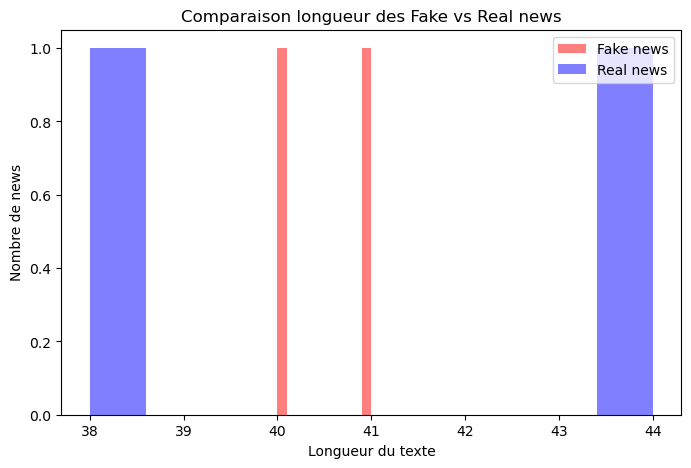

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Création d'un petit dataset fictif
data = {
    "text": [
        "Breaking news: Aliens landed in New York!",
        "Scientists discover new treatment for cancer",
        "Fake celebrity gossip circulating online",
        "Elections results announced officially"
    ],
    "label": [0, 1, 0, 1]  # 0 = Fake, 1 = Real
}

df = pd.DataFrame(data)

# Ajouter une colonne longueur du texte
df['length'] = df['text'].apply(len)

# Histogramme
plt.figure(figsize=(8,5))
plt.hist(df[df['label']==0]['length'], alpha=0.5, label='Fake news', color='red')
plt.hist(df[df['label']==1]['length'], alpha=0.5, label='Real news', color='blue')
plt.xlabel('Longueur du texte')
plt.ylabel('Nombre de news')
plt.title('Comparaison longueur des Fake vs Real news')
plt.legend()
plt.show()


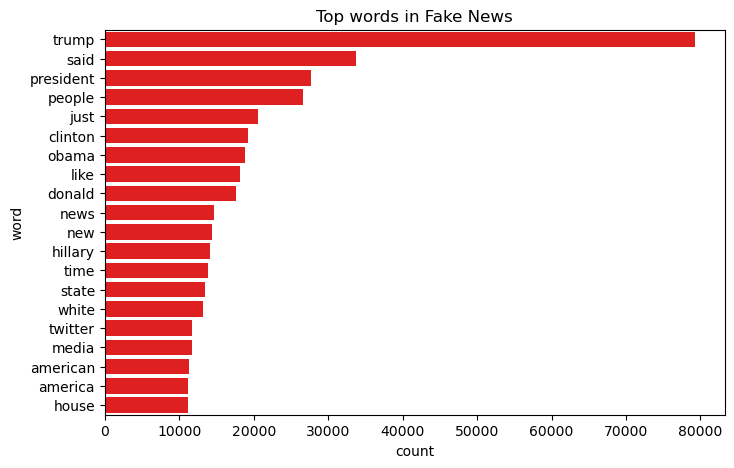

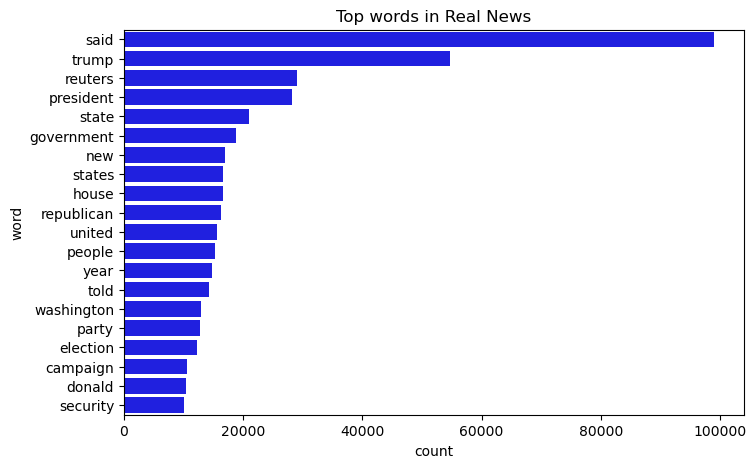

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Charger Fake & Real
df_fake = pd.read_csv("Fake.csv.csv")
df_real = pd.read_csv("True.csv.csv")

df_fake["label"] = 0
df_real["label"] = 1

# Texte
fake_text = df_fake["text"]
real_text = df_real["text"]

# Vectorizer
cv = CountVectorizer(stop_words="english", max_features=20)

# Fake words
fake_words = cv.fit_transform(fake_text)
fake_count = fake_words.sum(axis=0).A1
fake_vocab = cv.get_feature_names_out()

df_fake_words = pd.DataFrame({"word": fake_vocab, "count": fake_count})
df_fake_words = df_fake_words.sort_values(by="count", ascending=False)

# Real words
cv2 = CountVectorizer(stop_words="english", max_features=20)
real_words = cv2.fit_transform(real_text)
real_count = real_words.sum(axis=0).A1
real_vocab = cv2.get_feature_names_out()

df_real_words = pd.DataFrame({"word": real_vocab, "count": real_count})
df_real_words = df_real_words.sort_values(by="count", ascending=False)

# Plot Fake
plt.figure(figsize=(8,5))
sns.barplot(x="count", y="word", data=df_fake_words, color="red")
plt.title("Top words in Fake News")
plt.show()

# Plot Real
plt.figure(figsize=(8,5))
sns.barplot(x="count", y="word", data=df_real_words, color="blue")
plt.title("Top words in Real News")
plt.show()


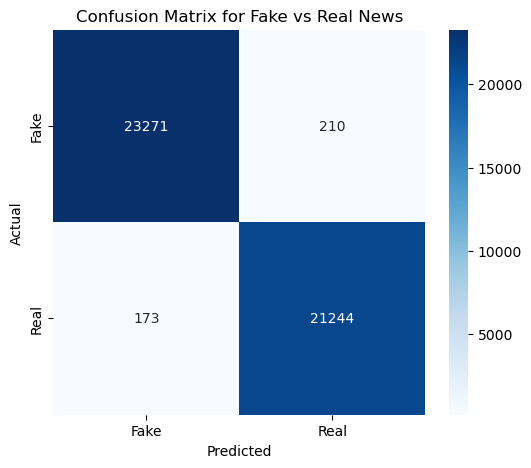

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Charger les datasets
df_fake = pd.read_csv("Fake.csv.csv")
df_real = pd.read_csv("True.csv.csv")

df_fake["label"] = 0   
df_real["label"] = 1   

df = pd.concat([df_fake, df_real], ignore_index=True)

# Transformer en TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["text"])
y = df["label"]

#  Entraîner le modèle
model = LogisticRegression()
model.fit(X, y)

#  Prédire sur tout le dataset
y_pred = model.predict(X)

# Matrice de confusion
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fake", "Real"],
            yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Fake vs Real News")
plt.show()


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Charger les fichiers
df_fake = pd.read_csv("Fake.csv.csv")
df_real = pd.read_csv("True.csv.csv")

df_fake["label"] = 0
df_real["label"] = 1

df = pd.concat([df_fake, df_real], ignore_index=True)

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["text"])
y = df["label"]

# Liste des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}

#  Évaluer chaque modèle
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"{name} → Accuracy : {acc:.4f}")


Logistic Regression → Accuracy : 0.9915
Naive Bayes → Accuracy : 0.9359


c:\Users\amani\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM → Accuracy : 0.9989
KNN → Accuracy : 0.8804


c:\Users\amani\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



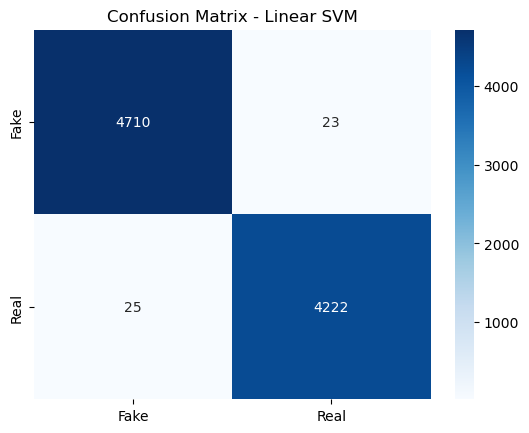

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Charger les datasets
df_fake = pd.read_csv("Fake.csv.csv")
df_real = pd.read_csv("True.csv.csv")

df_fake["label"] = 0  # Fake
df_real["label"] = 1  # Real

df = pd.concat([df_fake, df_real], ignore_index=True)

# 2. Split train/test
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42
)

# 3. TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# 4. Linear SVM
model = LinearSVC()
model.fit(X_train, y_train)

# 5. Prédiction
y_pred = model.predict(X_test)

# 6. Rapport et matrice de confusion
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.title("Confusion Matrix - Linear SVM")
plt.show()


Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.94      0.81      4733
           1       0.90      0.58      0.70      4247

    accuracy                           0.77      8980
   macro avg       0.81      0.76      0.76      8980
weighted avg       0.80      0.77      0.76      8980



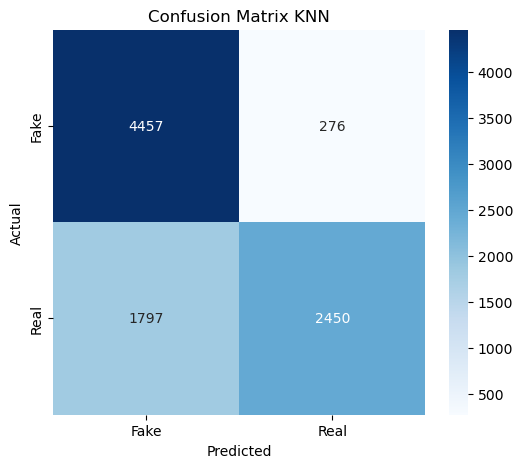

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df_fake = pd.read_csv("Fake.csv.csv")
df_real = pd.read_csv("True.csv.csv")

df_fake["label"] = 0  
df_real["label"] = 1  

df = pd.concat([df_fake, df_real], ignore_index=True)

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42
)


vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)


knn = KNeighborsClassifier(n_neighbors=5)  # tu peux changer k
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


print("Classification Report :\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN")
plt.show()


c:\Users\amani\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - accuracy: 0.9308 - loss: 0.2006 - val_accuracy: 0.9763 - val_loss: 0.0737
Epoch 2/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.9816 - loss: 0.0574 - val_accuracy: 0.9797 - val_loss: 0.0622
Epoch 3/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.9889 - loss: 0.0348 - val_accuracy: 0.9791 - val_loss: 0.0781
Epoch 4/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9936 - loss: 0.0193 - val_accuracy: 0.9855 - val_loss: 0.0588
Epoch 5/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.9943 - loss: 0.0168 - val_accuracy: 0.9839 - val_loss: 0.0647
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      4733
           1       0.98      0.99      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
we

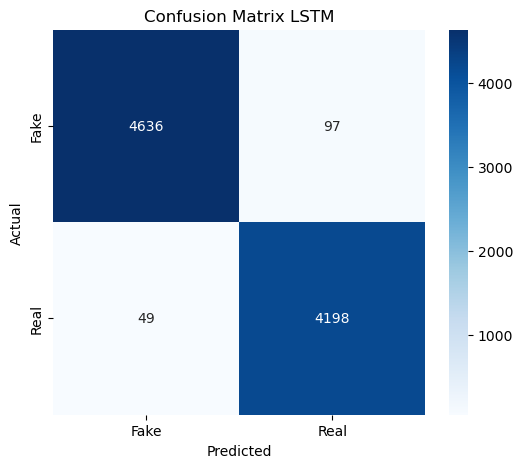

In [1]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

df_fake = pd.read_csv("Fake.csv.csv")
df_real = pd.read_csv("True.csv.csv")

df_fake["label"] = 0
df_real["label"] = 1

df = pd.concat([df_fake, df_real], ignore_index=True)


#  Préparer texte

max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df["text"])

X_seq = tokenizer.texts_to_sequences(df["text"])
X_pad = pad_sequences(X_seq, maxlen=max_len)
y = df["label"]


#  Split train/test

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)


#  Créer modèle LSTM

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


#  Entraîner modèle

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Évaluation

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

print("Classification Report :\n", classification_report(y_test, y_pred))




cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix LSTM")
plt.show()


c:\Users\amani\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.8558 - loss: 0.2502 - val_accuracy: 0.9916 - val_loss: 0.0256
Epoch 2/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9966 - loss: 0.0110 - val_accuracy: 0.9942 - val_loss: 0.0167
Epoch 3/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 0.9942 - val_loss: 0.0144
Epoch 4/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 1.0000 - loss: 5.2521e-04 - val_accuracy: 0.9947 - val_loss: 0.0149
Epoch 5/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 1.0000 - loss: 3.2922e-04 - val_accuracy: 0.9947 - val_loss: 0.0156
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4733
           1       0.99      1.00      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99 

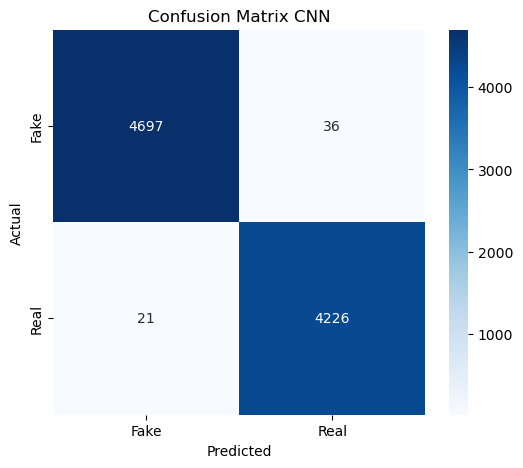

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense


# Charger les fichiers

df_fake = pd.read_csv("Fake.csv.csv")
df_real = pd.read_csv("True.csv.csv")

df_fake["label"] = 0
df_real["label"] = 1

df = pd.concat([df_fake, df_real], ignore_index=True)


#  Split train/test

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42
)


#  Tokenization

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


#  Construire CNN

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


#  Entraîner

model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.1)

#  Évaluer

y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix CNN")
plt.show()

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import gradio as gr

# Charger dataset
df_fake = pd.read_csv("Fake.csv.csv")   
df_real = pd.read_csv("True.csv.csv")   

# Combiner
df_fake['label'] = 0
df_real['label'] = 1
df = pd.concat([df_fake, df_real])
df = df.sample(frac=1).reset_index(drop=True)  

# TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Model
model = MultinomialNB()
model.fit(X, y)

# Fonction de prédiction
def predict(text):
    X_test = vectorizer.transform([text])
    pred = model.predict(X_test)[0]
    return "Real" if pred == 1 else "Fake"

# Interface Gradio
iface = gr.Interface(
    fn=predict,
    inputs=gr.Textbox(lines=2, placeholder="Écris un texte ici..."),
    outputs="text",
    title="Détection Fake News",
    description="Entre un texte et le modèle prédit s'il est Fake ou Real"
)

iface.launch()


c:\Users\amani\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


c:\Users\amani\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


NameError: name 'torch' is not defined

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import gradio as gr
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO


df_fake = pd.read_csv("Fake.csv.csv")
df_real = pd.read_csv("True.csv.csv")

df_fake['label'] = 0
df_real['label'] = 1

df = pd.concat([df_fake, df_real])
df = df.sample(frac=1).reset_index(drop=True)

# TF-IDF + Naive Bayes

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text'])
y = df['label']

model = MultinomialNB()
model.fit(X, y)


# Pipeline Hugging Face pour résumé

summarizer = pipeline("summarization") 

# Fonction WordCloud

def generate_wordcloud(text):
    wc = WordCloud(width=400, height=200, background_color="white").generate(text)
    plt.figure(figsize=(6,3))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches='tight')
    plt.close()
    buf.seek(0)
    return Image.open(buf)


# Fonction de prédiction + résumé + WordCloud

def detect_and_summarize(text):
    #  Détection Fake/Real
    X_test = vectorizer.transform([text])
    pred = model.predict(X_test)[0]
    probas = model.predict_proba(X_test)[0]
    label = "Real" if pred==1 else "Fake"
    proba_text = f"Fake: {probas[0]*100:.2f}%, Real: {probas[1]*100:.2f}%"

    #  Résumé
    try:
        max_len = min(len(text.split()), 50)
        summary = summarizer(text, max_length=max_len, min_length=5, do_sample=False)[0]['summary_text']
    except:
        summary = "Texte trop court pour résumer"

    #  WordCloud
    wc_img = generate_wordcloud(text)

    return f"Label: {label}\nScore de confiance: {proba_text}\nRésumé: {summary}", wc_img


iface = gr.Interface(
    fn=detect_and_summarize,
    inputs=gr.Textbox(lines=5, placeholder="Écris un texte ici..."),
    outputs=[
        gr.Textbox(label="Résultat", lines=7),  
        gr.Image(label="WordCloud")
    ],
    title="Détection Fake News avec résumé et visualisation",
    description="Le modèle prédit si le texte est Fake ou Real, donne un score de confiance, un résumé, et un WordCloud."
)


iface.launch()


c:\Users\amani\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
